# The Tragedy of the Titanic

### Research Questions

1. How correlated are fare paid and the number of parents, children, spouses, and siblings on board? 
   - Add values in parch + sibsp
   - Find Pearson's value 
   - Prediction: strong correlation! >.80)

2. How correlated are ticket fare and the ticket class? 
   - Prediction: strong correlation!

3. What factors were the best predictors of survival on the Titanic?
   - Were women with children more likely to survive than women without children? 
   - Was embarkment point a predictor of survival? 
   - Ticket class? 
   - Ticket fare?
   
### Research Method

1. Import data as a pandas dataframe
2. Print basic stats (mean, median, mode, etc.) on age, sibsp, parch, and fare
3. Create bar graph/pie chart of gender and embarking point 
4. Compare fare vs sibsp + parch (#1 research question) 
5. Compare fare vs ticket class (#2 research question) 
6. Use the groupby function 
   - Group women w/ children vs women w/o children 
       - What was the survival % difference? 
       - Filter out women younger than 18, because they're probably someone else's kid
   - Group by embarkment point
       - What was the survival % in each? 
   - Group by class
       - What was the survival % in each?
       - Create 3 boxplots of fare spent in each class (stack above one another) 
       - OR create 3 histograms of fare spent (bins 0-10,11-20 etc.) stacked upon one another (make translucent) 
          - Having some relationship gives us the justification to pursue the last step below to assume class has an impact on survival 
   - Group by survival 
       - Create 2 histograms (stacked above & below axis) of fare spent (bins 0-10,11-20, etc.) on x-axis and survivors/victims on y-axes
7. Clean/wrangle data throughout

### Import Data

In [257]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

titan_data = pd.read_csv('titanic-data.csv',header=0,index_col='PassengerId')
print(type(titan_data))
print(titan_data.head(n=10)) # default for head is 5 rows

<class 'pandas.core.frame.DataFrame'>
             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   
8                   0       3   
9                   1       3   
10                  1       2   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6    

** Observations: ** 
- lots of NaN values in Age & Cabin
- Are no. of parch and sibsp matching up with # of people on board with the same last name? (Are people sneaking on?)
- Name has a lot of extra info in parantheses (e.g. nicknames)
- Ticket number is not always uniform 
- Summary: nothing to clean for now but keep NaN values in mind

### Data Wrangling

In [256]:
pd.isnull(titan_data)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,True,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,True,False


In [262]:
def check_nulls(df,column):
    print(column)
    print(len(df[column][pd.isnull(df[column])]))

check_nulls(titan_data,'Survived')
check_nulls(titan_data,'Pclass')
check_nulls(titan_data,'Sex')
check_nulls(titan_data,'Age')
check_nulls(titan_data,'SibSp')
check_nulls(titan_data,'Parch')
check_nulls(titan_data,'Fare')
check_nulls(titan_data,'Embarked')

Survived
0
Pclass
0
Sex
0
Age
177
SibSp
0
Parch
0
Fare
0
Embarked
2


** Observations: ** 
- too many NaN values in Cabin (75% of first 20 rows) - DELETE COLUMN
- ticket and name formatting aren't helpful right now - DELETE COLUMN
- any NaN values in other columns? (out of 891)
    - Age: 177 - DELETE ROW
    - Embarked: 2 - DELETE ROW

In [269]:
# delete Cabin and Ticket columns
titan_data = titan_data.drop(['Cabin','Ticket'],axis=1)

In [276]:
# delete rows where Age or Embarked are NaN (initial # of rows are 891)
titan_data.dropna(axis=0, how='any', subset=['Age','Embarked'], inplace=True)

# new number of rows are 712

### Data Analysis

In [278]:
# Get descriptive stats on all quantitative variables 

titan_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


** Key highlights: ** 
- 40% of people survived, which is only 285 out of 712 
- Most people were in second or third class 
- Ages of people on the boat ranged from less than 1 years old to 80
- Minimum age is weird (0.42), but kaggle explains age is fractional if less than 1. Also note if the age is estimated, it will be in the form of xx.5. Some ages are also missing 
- Biggest family included someone who had 1 spouse and 4 siblings 
- Some people spent 0 pounds to embark... were they first class or crew or something else? 

In [279]:
# Find out more about the folks that paid $0 in fare

#titan_data[titan_data['Fare']==0]
titan_data[titan_data.loc[:, 'Fare']==0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,0.0,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,0.0,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,0.0,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,0.0,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,0.0,S
807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,0.0,S
823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,0.0,S


** Observations: ** 
- Almost all of these people died, even if they were in first class 
- All male and all embarked at Southampton, the very first stop
- Given all this info, one explanation is that they may have been crew

The number of survivors on the Titanic were 288
The number of dead on the Titanic were 424
The number of males on the Titanic were 453
The number of females on the Titanic were 259
The number of people who boarded at Cherbourg were 130
The number of people who boarded at Queenstown were 28
The number of people who boarded at Southampton were 554
The number of people in first class were 184
The number of people in second class were 173
The number of people in third class were 355


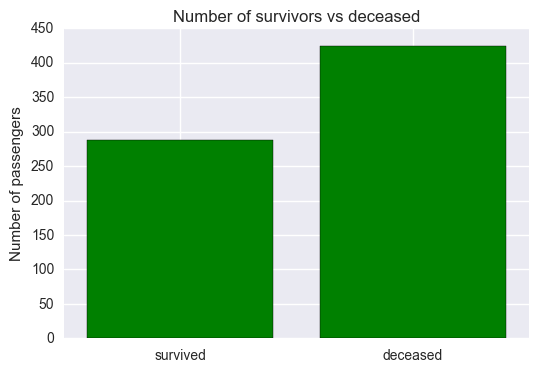

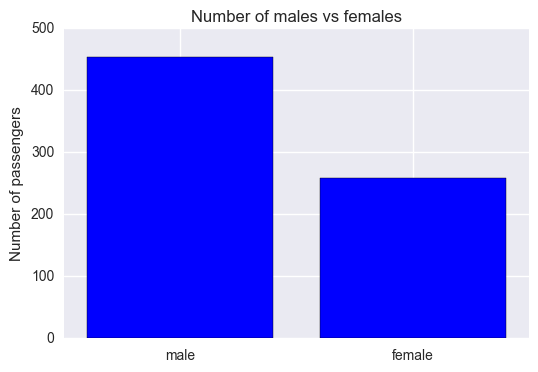

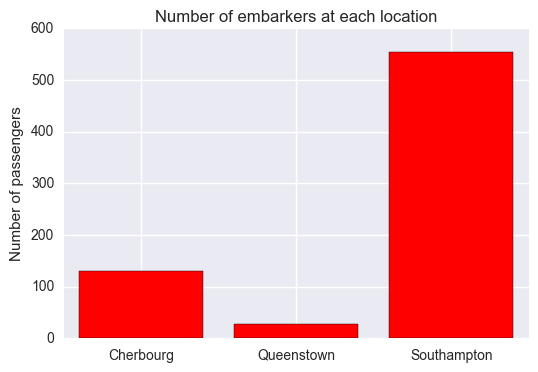

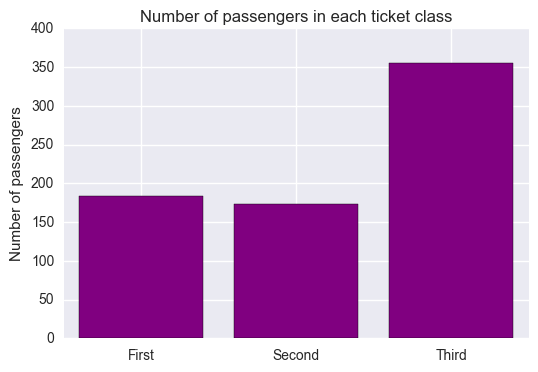

In [294]:
# Quickly describe categorical variables 

   # Survived v Dead 
survival_series = titan_data['Survived']
# print(genders_series[0:5])
survival_series2 = survival_series.as_matrix()
print('The number of survivors on the Titanic were %d' %(len(survival_series2[survival_series2==1])))
print('The number of dead on the Titanic were %d' %(len(survival_series2[survival_series2==0])))
# if more than 1D, consider .shape (e.g. genders_series2[genders_series2=='male'].shape[0])

y = [len(survival_series2[survival_series2==1]),len(survival_series2[survival_series2==0])]
x = [1,2]
labels = ['survived','deceased']
plt.bar(x, y, color="green", align = 'center')
plt.xticks(x, labels)
plt.ylabel('Number of passengers')
plt.title('Number of survivors vs deceased')


   # Male v Female
plt.figure()
genders_series = titan_data['Sex']
# print(genders_series[0:5])
genders_series2 = genders_series.as_matrix()
# print(genders_series2[0:5])
# print(len(genders_series2))
# print(type(genders_series2))
print('The number of males on the Titanic were %d' %(len(genders_series2[genders_series2=='male'])))
    # print ("alex is the {} - {}".format('best', str(1))) # better way to format print statement 

print('The number of females on the Titanic were %d' %(len(genders_series2[genders_series2!='male'])))

y = [len(genders_series2[genders_series2=='male']),len(genders_series2[genders_series2!='male'])]
x = [1,2]
labels = ['male','female']
plt.bar(x, y, color="blue", align = 'center')
plt.xticks(x, labels)
plt.ylabel('Number of passengers')
plt.title('Number of males vs females')


    # Embarkment location
plt.figure()
embark_pts = titan_data['Embarked']
embark_pts2 = embark_pts.as_matrix()
print('The number of people who boarded at Cherbourg were %d' %(len(embark_pts2[embark_pts2=='C'])))
print('The number of people who boarded at Queenstown were %d' %(len(embark_pts2[embark_pts2=='Q'])))
print('The number of people who boarded at Southampton were %d' %(len(embark_pts2[embark_pts2=='S'])))
y = [len(embark_pts2[embark_pts2=='C']),len(embark_pts2[embark_pts2=='Q']),len(embark_pts2[embark_pts2=='S'])]
x = [1,2,3]
labels = ['Cherbourg','Queenstown','Southampton']
plt.bar(x,y,color='red',align='center')
plt.xticks(x,labels)
plt.ylabel('Number of passengers')
plt.title('Number of embarkers at each location')


 # Class 
plt.figure()
class_pts = titan_data['Pclass']
class_pts2 = class_pts.as_matrix()
print('The number of people in first class were %d' %(len(class_pts2[class_pts2==1])))
print('The number of people in second class were %d' %(len(class_pts2[class_pts2==2])))
print('The number of people in third class were %d' %(len(class_pts2[class_pts2==3])))
y = [len(class_pts2[class_pts2==1]),len(class_pts2[class_pts2==2]),len(class_pts2[class_pts2==3])]
x = [1,2,3]
labels = ['First','Second','Third']
plt.bar(x,y,color='purple',align='center')
plt.xticks(x,labels)
plt.ylabel('Number of passengers')
plt.title('Number of passengers in each ticket class')


PassengerId
60     46.9
72     46.9
387    46.9
481    46.9
679    46.9
684    46.9
Name: Fare, dtype: float64
0.206502080093


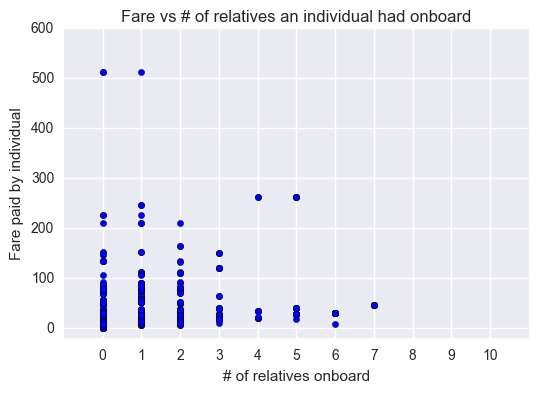

In [296]:
# Searching for correlation between fare and sibsp + parch (#1 research question). 
# Did people who paid higher for tickets generally also bring more people with them on the trip? 

# Create series that combines parch & sibsp
all_relatives = titan_data.loc[:, 'Parch'] + titan_data.loc[:, 'SibSp']

# Create series for fare 
all_fares = titan_data.loc[:,'Fare']

# Create a scatter plot 
plt.scatter(all_relatives,all_fares)
plt.xlim(-1,11)
plt.ylim(-20,600)
plt.xticks(range(0,11))
plt.xlabel('# of relatives onboard')
plt.ylabel('Fare paid by individual')
plt.title('Fare vs # of relatives an individual had onboard')
print(all_fares[all_relatives==7]) # each member of one family paid same amount

# Calculate Pearson's value (prediction: strong! >.80)
print(np.corrcoef(all_relatives, all_fares)[0,1])

    # actually, the correlation is pretty weak! People who paid higher fares may or may not have more relatives on board. 
    # also interesting finding: people in one family all paid the same amount each! 

-0.552893220646


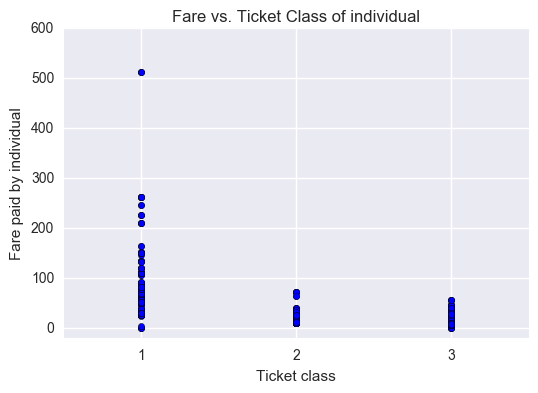

In [298]:
# Searching for correlation between fare and class (#2 research question). 
# Did people who paid higher for tickets generally stay in higher class? 
    # Prediction: strong negative correlation because 1 = first class (richest people)

# Create series that combines parch & sibsp
all_classes = titan_data.loc[:, 'Pclass']

# Create series for fare 
all_fares = titan_data.loc[:,'Fare']

# Create a scatter plot 
plt.scatter(all_classes,all_fares)
plt.ylim(-20,600)
plt.xticks([1,2,3])
plt.xlabel('Ticket class')
plt.ylabel('Fare paid by individual')
plt.title('Fare vs. Ticket Class of individual')
# Calculate Pearson's value (prediction: strong! >.80)
print(np.corrcoef(all_classes, all_fares)[0,1])

    # correlation is moderately negative! People who paid higher fares were generally in first class. 

In [299]:
# Group by sex 
counts_by_gender = titan_data.groupby(['Sex']).count()
sums_by_gender = titan_data.groupby(['Sex']).sum()
print(counts_by_gender)
print(sums_by_gender)

female_percent_survival = sums_by_gender.iloc[0,0] / counts_by_gender.iloc[0,0]
print('The female survival rate was {}'.format(female_percent_survival))
male_percent_survival = sums_by_gender.iloc[1,0]/counts_by_gender.iloc[1,0]
print('The male survival rate was {}'.format(male_percent_survival))

        Survived  Pclass  Name  Age  SibSp  Parch  Fare  Embarked
Sex                                                              
female       259     259   259  259    259    259   259       259
male         453     453   453  453    453    453   453       453
        Survived  Pclass       Age  SibSp  Parch        Fare
Sex                                                         
female       195     537   7186.00    167    185  12259.1002
male          93    1058  13919.17    199    123  12352.7828
The female survival rate was 0.752895752896
The male survival rate was 0.205298013245


In [300]:
# Group women w/ children vs women w/o children
    # Filtered out women younger than 18, because they're probably some other woman's kid (Parch value is more likely to hold parents)
    # Included women with NaN for age values otherwise lots of data was missing (note: this means that there might be more women being included with parch having parents)

no_women = titan_data[(titan_data['Sex']=='female')].shape[0]
no_young_women = titan_data[(titan_data['Sex']=='female') & (titan_data['Age']<=18)].shape[0]
no_adult_women = titan_data[(titan_data['Sex']=='female') & ( (titan_data['Age']>18) | (titan_data['Age'].isnull()))].shape[0]

# analyzing survival among adult women with kids 
no_adult_women_kids = titan_data[(titan_data['Sex']=='female') & ((titan_data['Age']>18) | (titan_data['Age'].isnull())) & (titan_data['Parch']>0)].shape[0]
no_adult_women_kids_survived = titan_data[(titan_data['Sex']=='female') & ((titan_data['Age']>18) |(titan_data['Age'].isnull())) & (titan_data['Parch']>0) & (titan_data['Survived']==1)].shape[0]

# analyzing survival among adult women without kids 
no_adult_women_nokids = titan_data[(titan_data['Sex']=='female') & ((titan_data['Age']>18) | (titan_data['Age'].isnull())) & (titan_data['Parch']==0)].shape[0]
no_adult_women_nokids_survived = titan_data[(titan_data['Sex']=='female') & ((titan_data['Age']>18) | (titan_data['Age'].isnull())) & (titan_data['Parch']==0) & (titan_data['Survived']==1)].shape[0]

# print(no_women)
# print(no_young_women)
# print(no_adult_women)
# print(no_adult_women_kids_survived)
# print(no_adult_women_kids)
# print(no_adult_women_nokids_survived)
# print(no_adult_women_nokids)
print('The survival rate for adult women with kids was {}'.format(str(no_adult_women_kids_survived*1.0/no_adult_women_kids)))
print('The survival rate for adult women without kids was {}'.format(str(no_adult_women_nokids_survived*1.0/no_adult_women_nokids)))



The survival rate for adult women with kids was 0.75
The survival rate for adult women without kids was 0.795275590551


** Observations: ** 
- Cannot be 100% sure about results because Parch value doesn't separate parents from kids.. older women might have parents & no kids and would be included in this analysis as "with kids" 
- Keeping that in mind, being a woman with kids did not seem to significantly increase survival rate. In fact, it suggests your chance of survival DROPS. This is surprising!! 

In [301]:
# Create my own function to print survival rate for variables with 3 categories

def survival_rates(df,variable,attribute1,attribute2,attribute3):
    no_1 = df[(df[variable]==attribute1)].shape[0]
    no_1_survived = df[(df[variable]==attribute1) & (df['Survived']==1)].shape[0]
    no_2 = df[(df[variable]==attribute2)].shape[0]
    no_2_survived = df[(df[variable]==attribute2) & (df['Survived']==1)].shape[0]
    no_3 = df[(df[variable]==attribute3)].shape[0]
    no_3_survived = df[(df[variable]==attribute3) & (df['Survived']==1)].shape[0]

    print('The survival rate for {} was {}'.format(attribute1, str(no_1_survived*1.0/no_1)))
    print('The survival rate for {} was {}'.format(attribute2, str(no_2_survived*1.0/no_2)))
    print('The survival rate for {} was {}'.format(attribute3, str(no_3_survived*1.0/no_3)))


In [302]:
print('Adult women with children')
survival_rates(titan_data[(titan_data['Sex']=='female')&(titan_data['Age']>18)&(titan_data['Parch']>0)],'Pclass',1,2,3)
print('')
print('Adult women without children')
survival_rates(titan_data[(titan_data['Sex']=='female')&(titan_data['Age']>18)&(titan_data['Parch']==0)],'Pclass',1,2,3)

Adult women with children
The survival rate for 1 was 0.954545454545
The survival rate for 2 was 0.95
The survival rate for 3 was 0.363636363636

Adult women without children
The survival rate for 1 was 0.98
The survival rate for 2 was 0.875
The survival rate for 3 was 0.459459459459


In [303]:
survival_rates(titan_data,'Embarked','C','Q','S')

The survival rate for C was 0.607692307692
The survival rate for Q was 0.285714285714
The survival rate for S was 0.362815884477


** Observations: ** 
- Embarkers at Cherbourg had the highest survival rate. 
- The departure route was Southampton -> Cherbourg -> Queenstown; nothing stands out the order of stops.. 
- Embarkment point might still not be as strong of a predictor as class -- perhaps more upper class passengers boarded at Cherbourg (confounding factor). I study this next!  

In [304]:
# Group by class - what was the survival % in each?

survival_rates(titan_data,'Pclass',1,2,3)

The survival rate for 1 was 0.652173913043
The survival rate for 2 was 0.479768786127
The survival rate for 3 was 0.239436619718


In [305]:
survival_rates(titan_data[titan_data['Embarked']=='C'],'Pclass',1,2,3)

The survival rate for 1 was 0.716216216216
The survival rate for 2 was 0.533333333333
The survival rate for 3 was 0.439024390244


** Observations: ** 
- Survival rate for first class was higher than second class, and second class was higher than first 
- Question: does being a woman predict greater survival among passengers in each class?

In [306]:
print('men')
survival_rates(titan_data[titan_data['Sex']=='male'],'Pclass',1,2,3)
print('')
print('women')
survival_rates(titan_data[titan_data['Sex']=='female'],'Pclass',1,2,3)

men
The survival rate for 1 was 0.39603960396
The survival rate for 2 was 0.151515151515
The survival rate for 3 was 0.150197628458

women
The survival rate for 1 was 0.963855421687
The survival rate for 2 was 0.918918918919
The survival rate for 3 was 0.460784313725


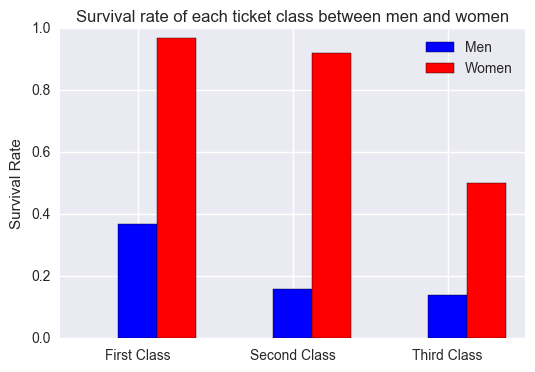

In [307]:
# Create a bar plot of above data

fig, ax = plt.subplots()
male_data = [0.37,0.16,0.14]
female_data = [0.97,0.92,0.5]
N = 3
x = np.arange(N)  # the x locations for the groups
widthx = 0.25
labels = ['First Class', 'Second Class', 'Third Class']
rect1 = ax.bar(x, male_data, width=widthx, color="blue", align='center')
rect2 = ax.bar(x + widthx,female_data,width = widthx, color="red", align='center')
plt.xticks(x,labels)
plt.ylabel('Survival Rate')
plt.title('Survival rate of each ticket class between men and women')
ax.legend((rect1[0], rect2[0]), ('Men', 'Women'))

** Observations: ** 
- Survival rate for first & second class women was significantly higher than the survival rate for third class women
- Women were also SO much  more likely than men to survive, and this was true for every class
- Question: does being a young woman (<18) predict greater survival in any class?

In [291]:
survival_rates(titan_data[(titan_data['Sex']=='female')&(titan_data['Age']<18)],'Pclass',1,2,3)

The survival rate for 1 was 0.875
The survival rate for 2 was 1.0
The survival rate for 3 was 0.542857142857


** Observations: ** 
- Surprising!: All young women in 2nd class survived compared to only 88% in first class 

### Conclusions

**1. How correlated are fare paid and the number of relatives on board?**
   - I predicted there would be a positive correlation because people would pay higher prices to have more people on board
   - The reality was that fare & relatives had a very weak, positive correlation (r = 0.22)
   - Fare price was determined by class, not the number of people you brought on board
   - People in one family generally stayed in the same ticket class and paid the same ticket fare
   - People brought a varying number of relatives on board in all three ticket classes 

**2. How correlated are ticket fare and the ticket class?**
   - I predicted there would be a strong, negative correlation because the lower the class number (1st class is "lowest" class), the higher the ticket fare probably was
   - The correlation coefficient was moderately negative (r = -0.55)
   - There were other factors causing the fare prices to vary, probably where on the ship the cabin was located/the type of cabin. Grouping similar cabin types/locations in future analyses will probably better predict fare price

**3. What factors were the best predictors of survival on the Titanic?**
   - Women with children
       - When observing women across the whole ship, women with children were not more likely to survive than women without children
       - When observing women in specific ticket classes, women with children became more likely to survive than women without children in second class, but not first or third. 
       - This is surprising, given background info about the titanic! 
       - **LIMITATION: A possible error could be coming from the fact that parents and children are not separated in the 'Parch' variable. While I tried to correct for it by only looking at women over 18 yrs old (women younger than 18 are more likely to be someone else's kid), this was not a foolproof method**
   - Embarkment point
       - Embarkers at Cherbourg had the highest survival rate
   - Ticket class
       - First class was 1.3x more likely to survive than second class and 2.6x more likely than third class
   - Sex 
       - Being a woman GREATLY increased your chance of survival. Eye-balling the bar graph, being a woman increased your chances of survival in first class by more than 2x, in second class by more than 4x, and third class by more than 3x
       
**OTHER GENERAL LIMITATIONS ** 
   - This dataset included information about 891 passengers though the real Titanic had 2208 people. Having a subset of the population limits our ability to depend on the analysis.
   - Info about 179 passengers were deleted because they had NaN values for important variables (e.g. age). If those values could've been included, the results might shift a bit. 
   - More info about the cabins could've improved predictions of survival. While ticket class was helpful, cabin locations or the size of cabins would've given more information about whether the person had a greater chance of reaching a lifeboat and/or if they were wealthier than someone else in the same class